#####    `Real Estate Price Prediction`

- Took a dataset of Bangalore home prices from kaggle
   [Link](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data).

In [199]:
#Importing usefull libraries.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

# New Section

In [200]:
#Importing Required Dataset
data = pd.read_csv("D:/project/A_Real_Estate_price_Prediction_Project/bengaluru_house_prices.csv")

In [201]:
#Data Head
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [202]:
data.shape

(13320, 9)

In [203]:
#Hide Warning
import warnings
warnings.filterwarnings("ignore")

- Checking What we can Drop

In [204]:
data.groupby("availability")["availability"].agg("count")

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [205]:
data.groupby("balcony")["balcony"].agg("count")

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

**Data Cleaning: Handle NA values**

In [206]:
data.groupby("society")["society"].agg("count")

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [207]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

For making our analysis simple lets drop some column which may less effect our annalysis

In [208]:
data_1 = data.drop(["availability","area_type","balcony","society"],axis=1)

In [209]:
data_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


- Checking size column

In [210]:
data_1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [211]:
data_1 = data_1.dropna(axis=0)

In [212]:
data_1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- making a fuction for extract  no of room  form  size

In [213]:
def extract_bhk(x):
    if type(x)!= "str":
        x= str(x)
    if len(x.split(" "))>1:
        if x.split(" ")[1]=="BHK":
            return(int(x.split(" ")[0])+2)
        elif x.split(" ")[1]=="RK":
            return(int(x.split(" ")[0])+1)
        else:
            return(int(x.split(" ")[0]))
    else :
        return(int(x.split(" ")[0]))

In [214]:
#check
extract_bhk("2 BHK"),extract_bhk("16 BHK"),extract_bhk("9 BHK"),extract_bhk("43 BHK")

(4, 18, 11, 45)

In [215]:
data_1["size"] = data_1["size"].apply(lambda x :extract_bhk(x))

In [216]:
data_1["size"].unique()

array([ 4,  5,  6,  3,  2,  1,  8,  7,  9, 13, 11, 29, 10, 12, 21, 18, 43,
       16, 15], dtype=int64)

In [217]:
data_1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,4,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,5,1440,2.0,62.00
3,Lingadheeranahalli,5,1521,3.0,95.00
4,Kothanur,4,1200,2.0,51.00


In [218]:
data_1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [219]:
data_1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [220]:
len(data_1["location"].unique())

1304

In [221]:
sorted(data_1["bath"].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 27.0,
 40.0]

In [222]:
data_1["bath"] =data_1["bath"].apply(lambda x: int(x))

In [223]:
sorted(data_1["bath"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 27, 40]

In [224]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [225]:
data_1 = data_1.reindex()

In [226]:
len(data_1["total_sqft"].unique())

2067

In [227]:
data_1['total_sqft'].isna().sum()

0

In [228]:
data_1["price"].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [229]:
len(data_1["price"].unique())

1955

In [230]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [231]:
data_2 = data_1.copy()

In [232]:
data_2.total_sqft = data_2.total_sqft.apply(convert_sqft_to_num)

In [233]:
data_2 = data_2[data_2.total_sqft.notnull()]

In [234]:
data_2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [235]:
data_3 = data_2.copy()

In [236]:
data_3.dtypes

location       object
size            int64
total_sqft    float64
bath            int64
price         float64
dtype: object

Feature Engineering
Add new feature called price per square feet

Lets add one column of Price Per Squrefeet to find oulier and better understanding of data


In [237]:
data_3 ["Price_Per_Sqft"] = data_3["price"] / data_3["total_sqft"]

In [238]:
data_3.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,4,1056.0,2,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5,120.00,0.046154
2,Uttarahalli,5,1440.0,2,62.00,0.043056
3,Lingadheeranahalli,5,1521.0,3,95.00,0.062459
4,Kothanur,4,1200.0,2,51.00,0.042500


The Price is in lak so lets convert it into thousand only for the Price per sqft part

In [239]:
data_3 ["Price_Per_Sqft"] =data_3 ["Price_Per_Sqft"]*100000

In [240]:
data_3.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,4,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,5,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,5,1521.0,3,95.00,6245.890861
4,Kothanur,4,1200.0,2,51.00,4250.000000


In [241]:
data_3.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_Per_Sqft    0
dtype: int64

In [242]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [243]:
data_3.location = data_3.location.apply(lambda x: x.strip())
location_count = data_3['location'].value_counts(ascending=False)
location_count

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [244]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [245]:
location_count_less_than_5 = location_count[location_count<=5]
location_count_less_than_5

location
Lavelle Road                 5
Maithri Layout               5
Stage-4 Bommanahalli         5
Nagashetty Halli             5
Kallumantapa                 5
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: count, Length: 903, dtype: int64

##### Dimensionality Reduction

In [246]:
data_3.location = data_3.location.apply(lambda x: 'other' if x in location_count_less_than_5 else x)
len(data_3.location.unique())

385

In [247]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [248]:
data_3['location'].value_counts(ascending=False)

location
other                 1784
Whitefield             533
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         264
                      ... 
Rajiv Gandhi Nagar       6
Venkatapura              6
Kumara Park              6
ITI Layout               6
Ashirvad Colony          6
Name: count, Length: 385, dtype: int64

In [249]:
data_3.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [250]:
data_4 = data_3.copy()

In [251]:
data_4.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,4,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,5,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,5,1521.0,3,95.00,6245.890861
4,Kothanur,4,1200.0,2,51.00,4250.000000


In [252]:
data_4.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 150 (i.e. 2 bhk apartment ie 4 room buling is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [253]:
data_4["size"] = data_4["size"].apply(lambda x: int(x) )

In [254]:
data_4["size"].unique()

array([ 4,  5,  6,  3,  2,  1,  8,  7,  9, 13, 11, 29, 10, 12, 21, 18, 43,
       16, 15], dtype=int64)

In [255]:
data_4.dtypes

location           object
size                int64
total_sqft        float64
bath                int64
price             float64
Price_Per_Sqft    float64
dtype: object

In [256]:
data_4[data_4.total_sqft/data_4['size'] < 150]

,location,size,total_sqft,bath,price,Price_Per_Sqft
45,HSR Layout,8,600.0,9,200.0,33333.333333
78,Kaval Byrasandra,4,460.0,1,22.0,4782.608696
89,Rajaji Nagar,6,710.0,6,160.0,22535.211268
119,Hennur Road,2,276.0,3,23.0,8333.333333
129,Vishwapriya Layout,7,950.0,7,115.0,12105.263158
...,...,...,...,...,...,...
13045,other,6,600.0,6,65.0,10833.333333
13076,Shivaji Nagar,4,500.0,1,20.0,4000.000000
13112,Nagavara,3,440.0,3,35.0,7954.545455
13216,other,3,250.0,2,40.0,16000.000000


In [257]:
data_4.shape

(13200, 6)

In [258]:
data_5 = data_4[data_4.total_sqft/data_4['size']>150].copy()

In [259]:
data_5

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,4,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,5,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,5,1521.0,3,95.00,6245.890861
4,Kothanur,4,1200.0,2,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4,231.00,6689.834926
13316,Richards Town,6,3600.0,5,400.00,11111.111111
13317,Raja Rajeshwari Nagar,4,1141.0,2,60.00,5258.545136
13318,Padmanabhanagar,6,4689.0,4,488.00,10407.336319


In [260]:
data_5.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,Electronic City Phase II,4,1056.0,2,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5,120.00,4615.384615
2,Uttarahalli,5,1440.0,2,62.00,4305.555556
3,Lingadheeranahalli,5,1521.0,3,95.00,6245.890861
4,Kothanur,4,1200.0,2,51.00,4250.000000


In [261]:
data_5.describe()

,size,total_sqft,bath,price,Price_Per_Sqft
count,12864.000000,12864.000000,12864.000000,12864.000000,12864.000000
mean,4.384950,1577.369071,2.640081,112.665189,6548.328804
std,1.024603,1244.688298,1.183524,150.444791,4137.649301
min,1.000000,351.000000,1.000000,10.000000,267.829813
25%,4.000000,1110.000000,2.000000,50.000000,4256.686930
50%,4.000000,1290.000000,2.000000,71.000000,5399.162720
75%,5.000000,1690.000000,3.000000,120.000000,7152.956410
max,29.000000,52272.000000,27.000000,3600.000000,76923.076923


In [262]:
data_5.Price_Per_Sqft.describe()

count    12864.000000
mean      6548.328804
std       4137.649301
min        267.829813
25%       4256.686930
50%       5399.162720
75%       7152.956410
max      76923.076923
Name: Price_Per_Sqft, dtype: float64

mean+sd ~ 10000

In [263]:
data_5[data_5["Price_Per_Sqft"]>10000]

,location,size,total_sqft,bath,price,Price_Per_Sqft
7,Rajaji Nagar,6,3300.0,4,600.0,18181.818182
9,other,6,1020.0,6,370.0,36274.509804
11,Whitefield,4,2785.0,5,295.0,10592.459605
18,Ramakrishnappa Layout,5,2770.0,4,290.0,10469.314079
22,Thanisandra,4,2800.0,5,380.0,13571.428571
...,...,...,...,...,...,...
13305,Hulimavu,3,500.0,1,220.0,44000.000000
13306,other,4,1200.0,5,325.0,27083.333333
13311,Ramamurthy Nagar,7,1500.0,9,250.0,16666.666667
13316,Richards Town,6,3600.0,5,400.0,11111.111111


In [264]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('location'):
        m = np.mean(subdata.Price_Per_Sqft)
        st = np.std(subdata.Price_Per_Sqft)
        reduced_data = subdata[(subdata.Price_Per_Sqft>(m-st)) & (subdata.Price_Per_Sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out

In [265]:
data_6 = remove_pps_outliers(data_5)

In [266]:
data_6.head()

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,1st Block HRBR Layout,7,2400.0,7,355.0,14791.666667
1,1st Block HRBR Layout,3,600.0,3,90.0,15000.000000
2,1st Block HRBR Layout,3,600.0,3,125.0,20833.333333
3,1st Block HRBR Layout,3,600.0,4,125.0,20833.333333
4,1st Block Jayanagar,6,2850.0,4,428.0,15017.543860


In [267]:
data_6.shape


(10385, 6)

In [268]:
def plot_scatter_chart(data, location):
    bhk2 = data[(data.location == location) & (data['size'] == 4)]
    bhk3 = data[(data.location == location) & (data['size'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

In [269]:
location_count.head()

location
Whitefield         533
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     264
Thanisandra        235
Name: count, dtype: int64

In [270]:
for i in location_count.index[0:10]:
    print(i)

Whitefield
Sarjapur  Road
Electronic City
Kanakpura Road
Thanisandra
Yelahanka
Uttarahalli
Hebbal
Marathahalli
Raja Rajeshwari Nagar


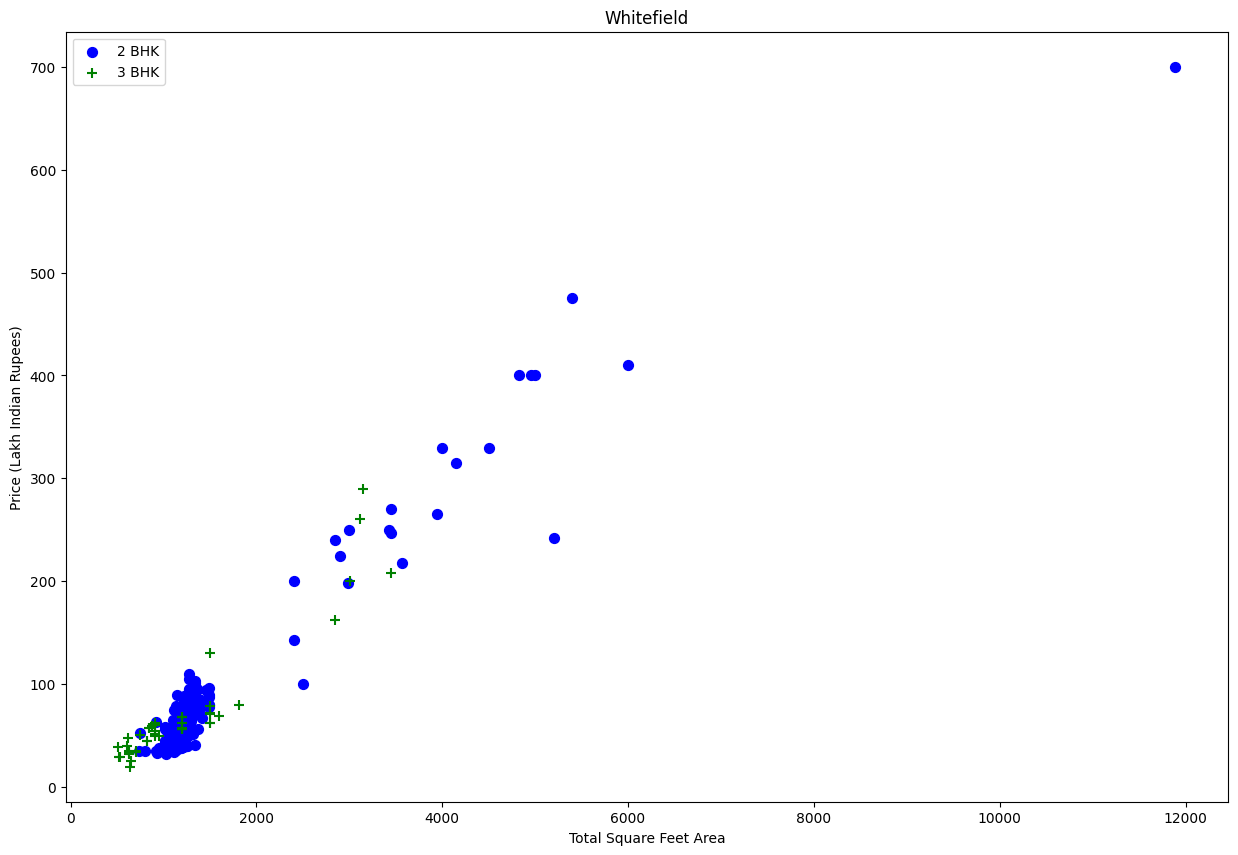

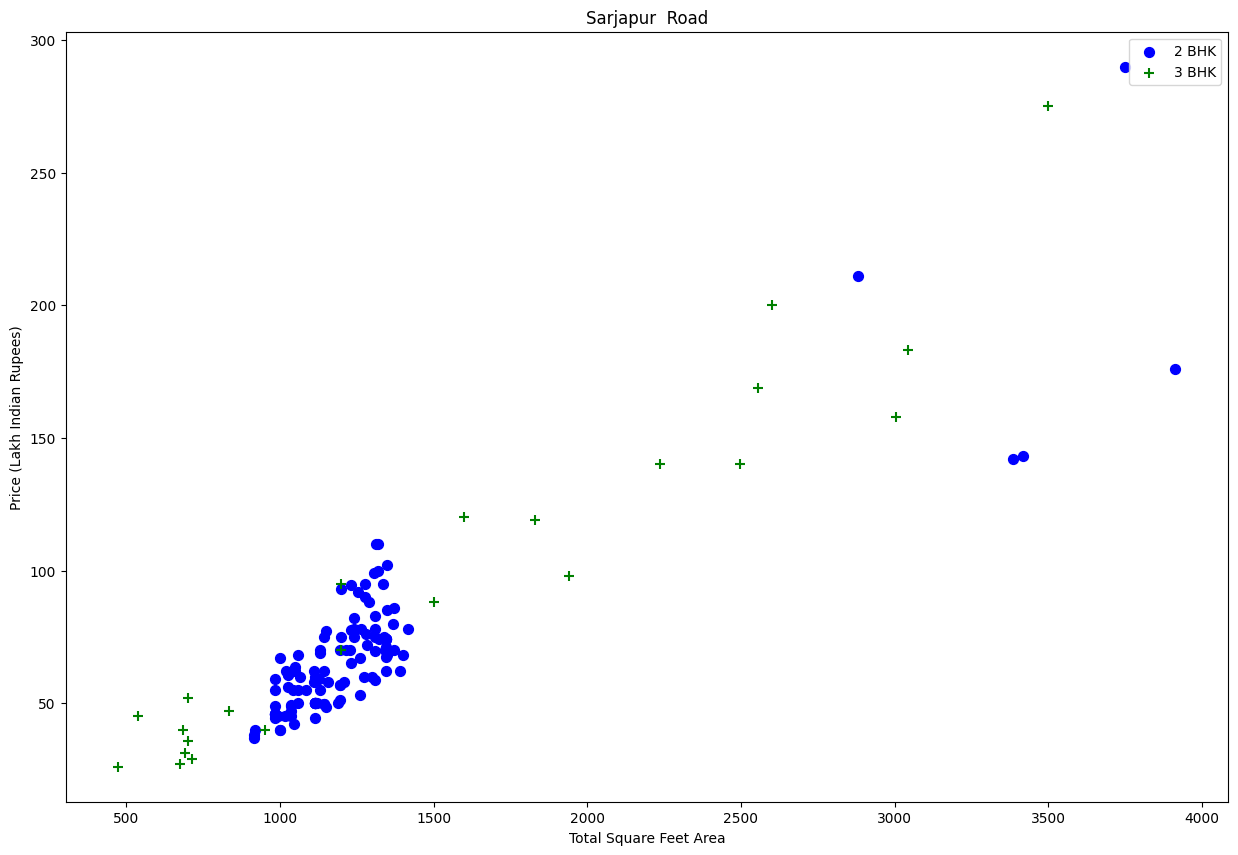

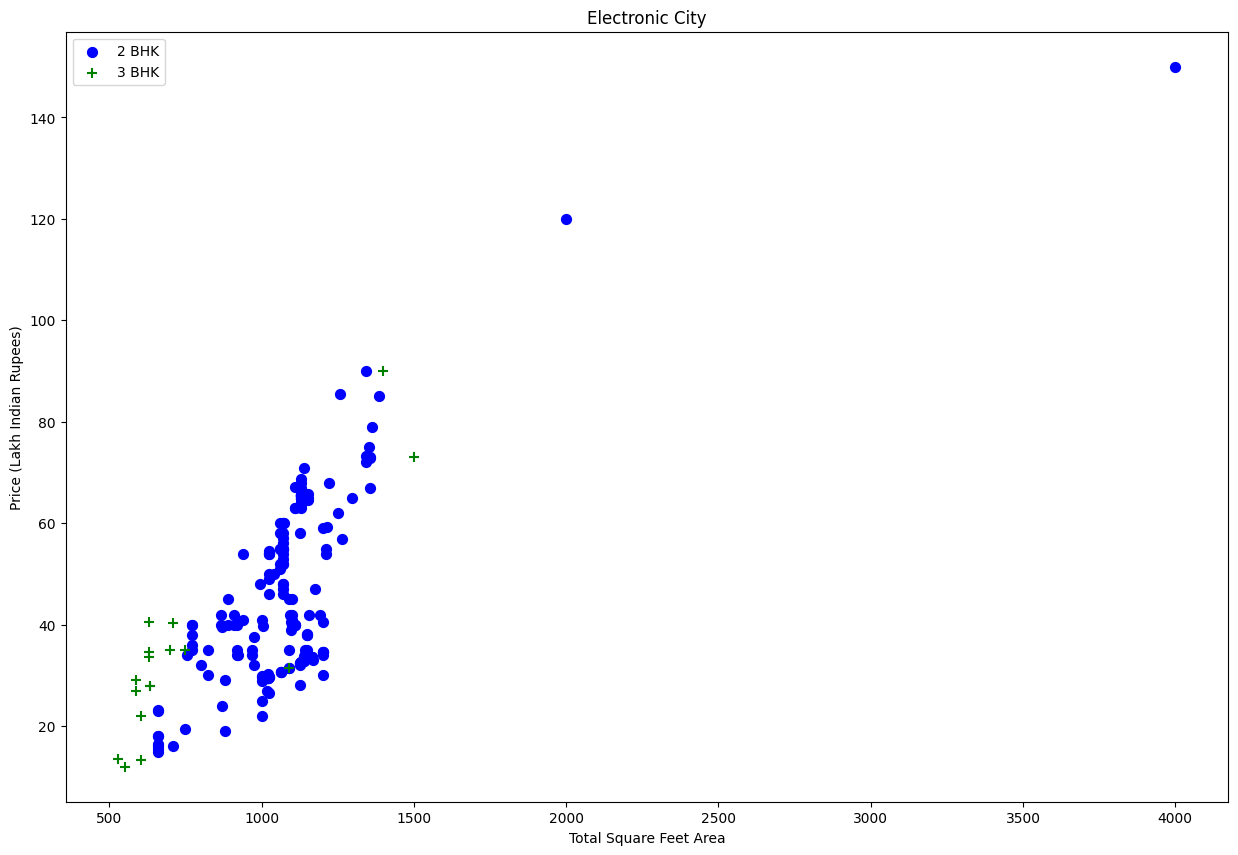

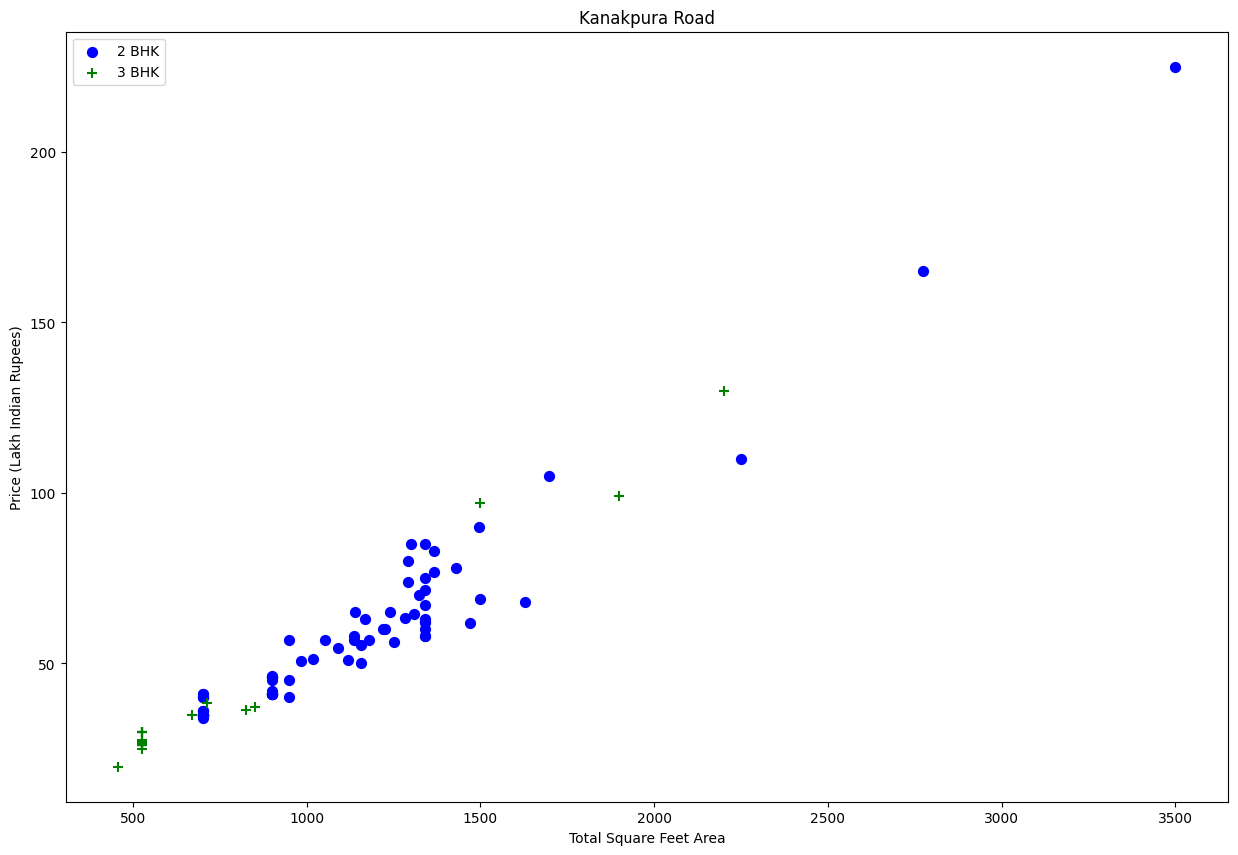

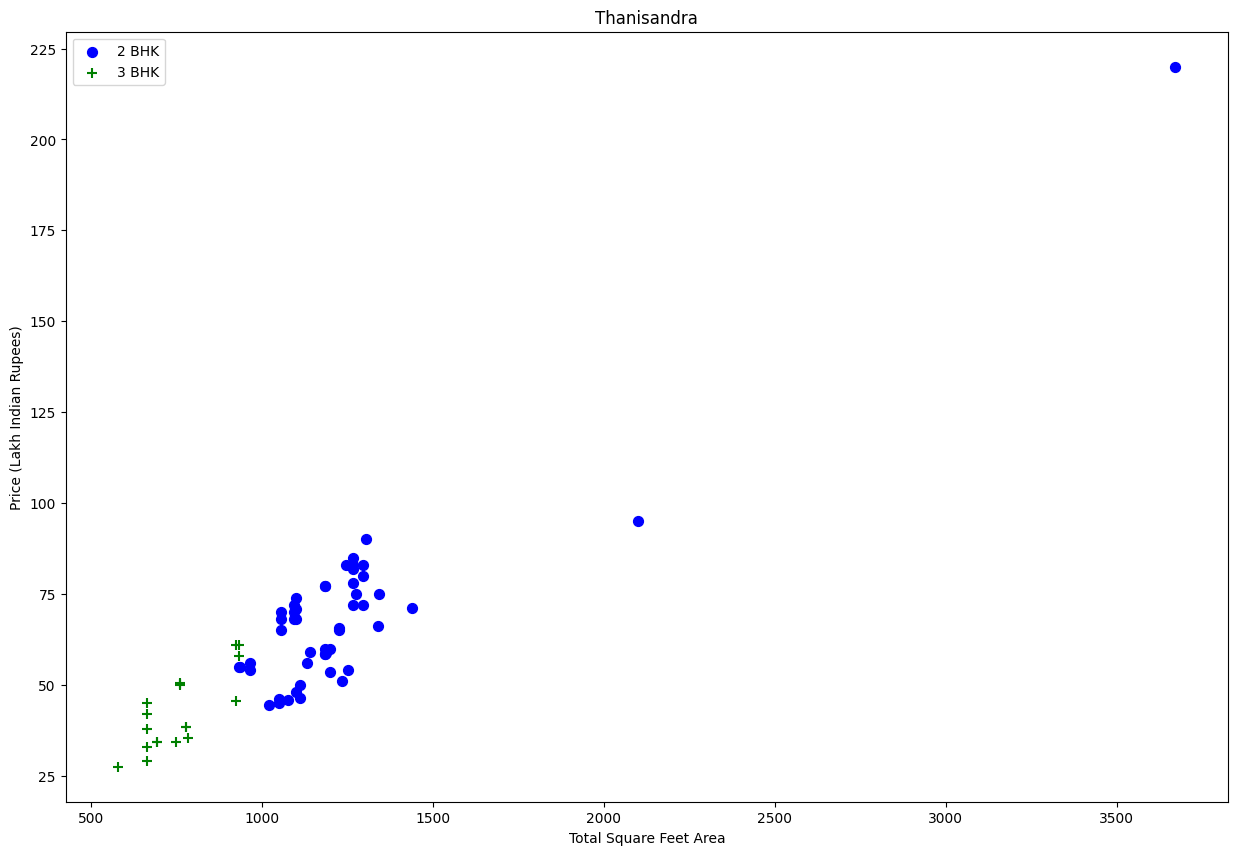

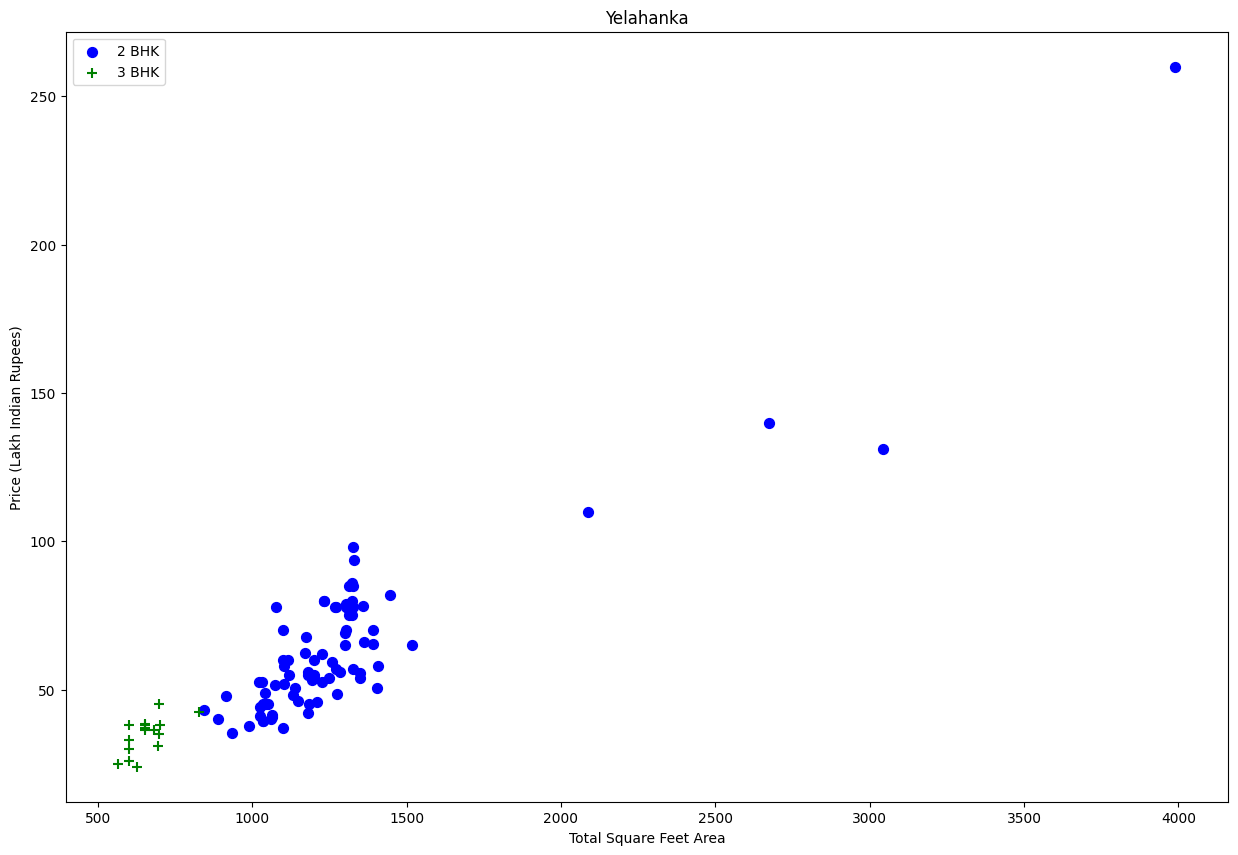

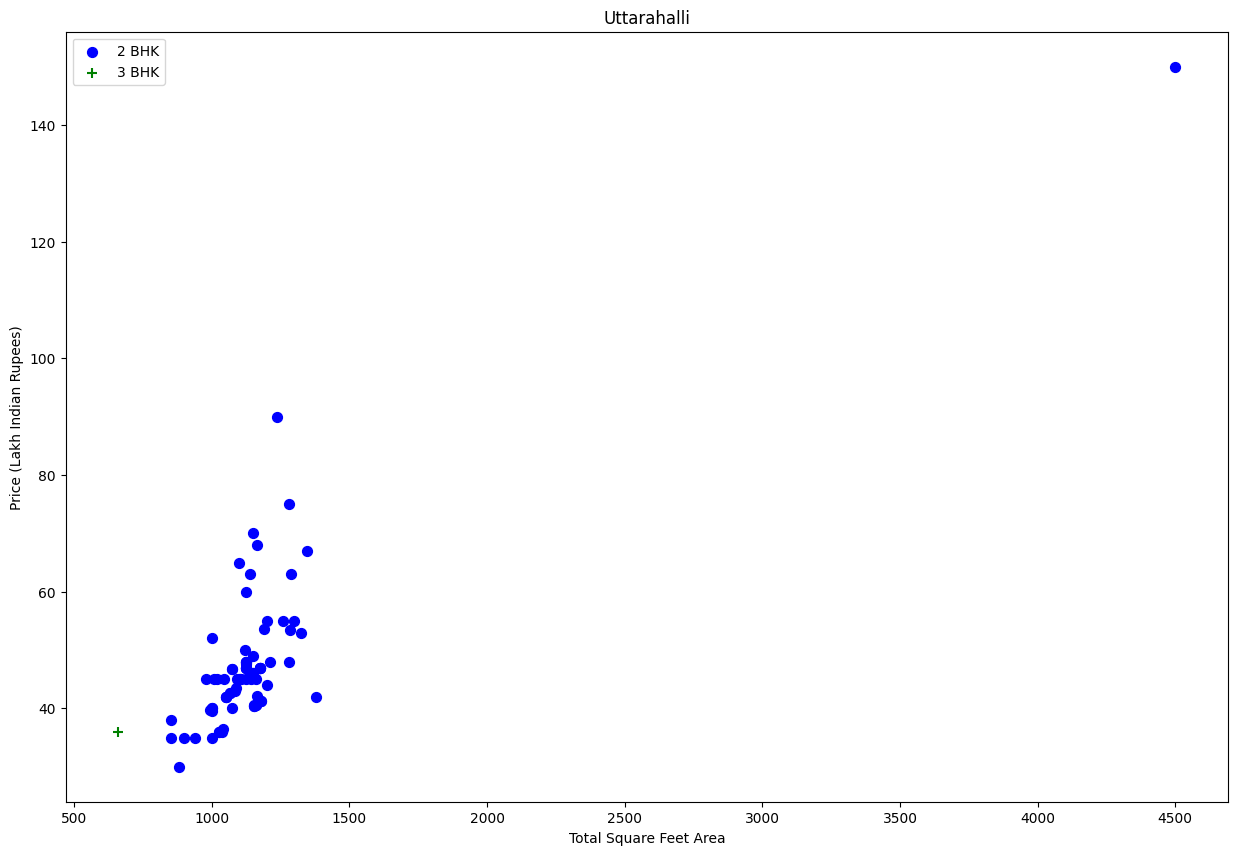

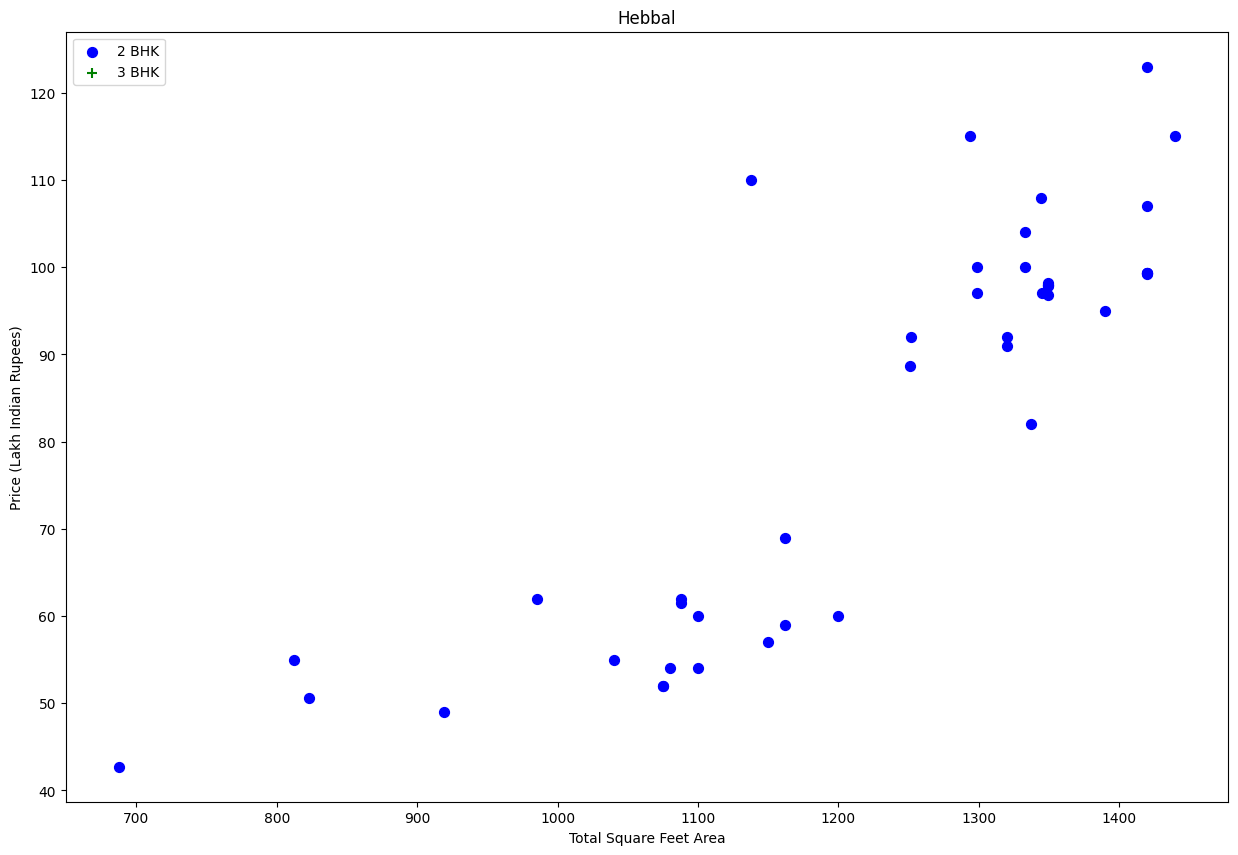

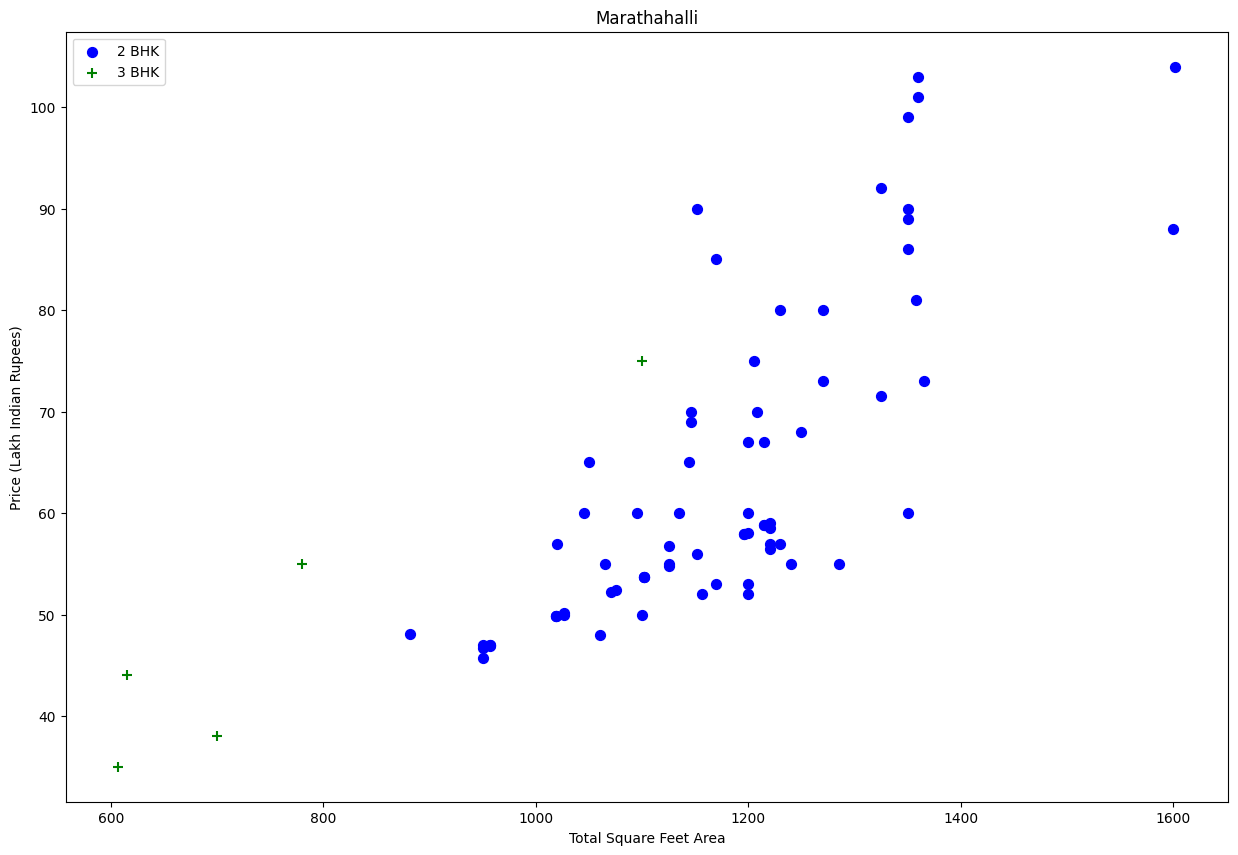

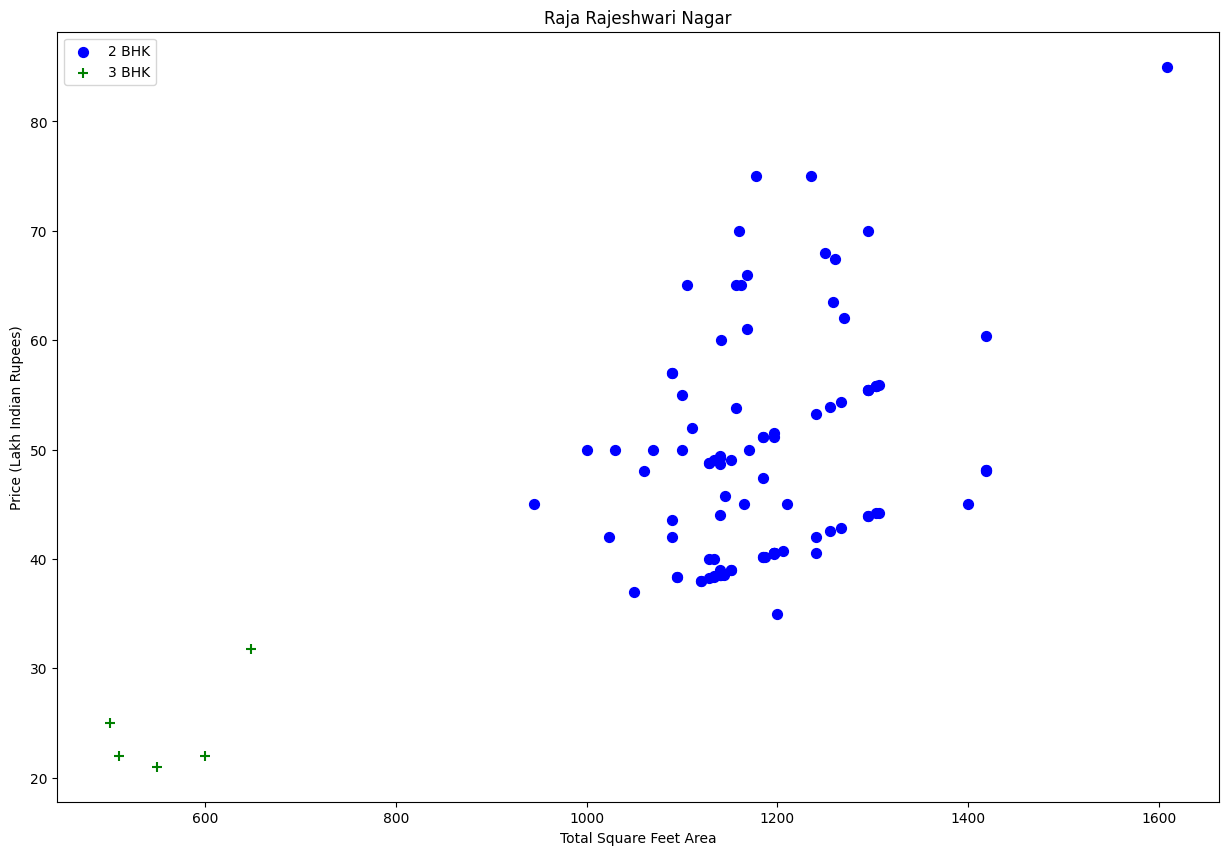

In [271]:
for i in location_count.index[0:10]:
    (plot_scatter_chart(data_6,i))

In [272]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        size_stats = {}
        for size, size_df in location_df.groupby('size'):
            size_stats[size] = {
                'mean': np.mean(size_df.Price_Per_Sqft),
                'std': np.std(size_df.Price_Per_Sqft),
                'count': size_df.shape[0]
            }
        for size, size_df in location_df.groupby('size'):
            stats = size_stats.get(size - 1)
            if stats and stats['count'] > 10:
                exclude_indices = np.append(exclude_indices, size_df[size_df.Price_Per_Sqft < (stats['mean'])].index.values)
    return data.drop(exclude_indices, axis='index')


In [273]:
data_7 = remove_bhk_outliers(data_6)

In [274]:
data_7

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,1st Block HRBR Layout,7,2400.0,7,355.0,14791.666667
1,1st Block HRBR Layout,3,600.0,3,90.0,15000.000000
2,1st Block HRBR Layout,3,600.0,3,125.0,20833.333333
3,1st Block HRBR Layout,3,600.0,4,125.0,20833.333333
4,1st Block Jayanagar,6,2850.0,4,428.0,15017.543860
...,...,...,...,...,...,...
10377,other,4,1650.0,1,130.0,7878.787879
10379,other,6,1200.0,3,125.0,10416.666667
10380,other,3,1800.0,1,200.0,11111.111111
10381,other,4,1353.0,2,110.0,8130.081301


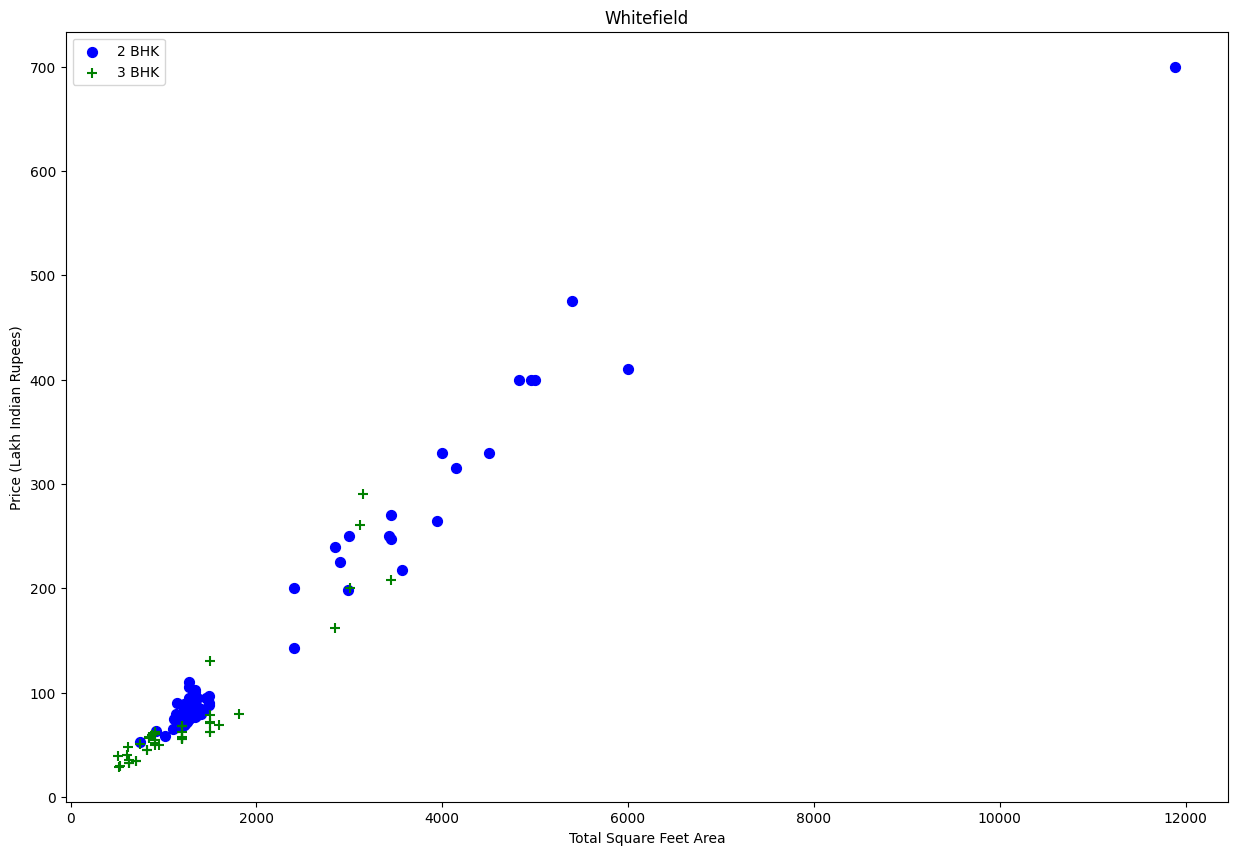

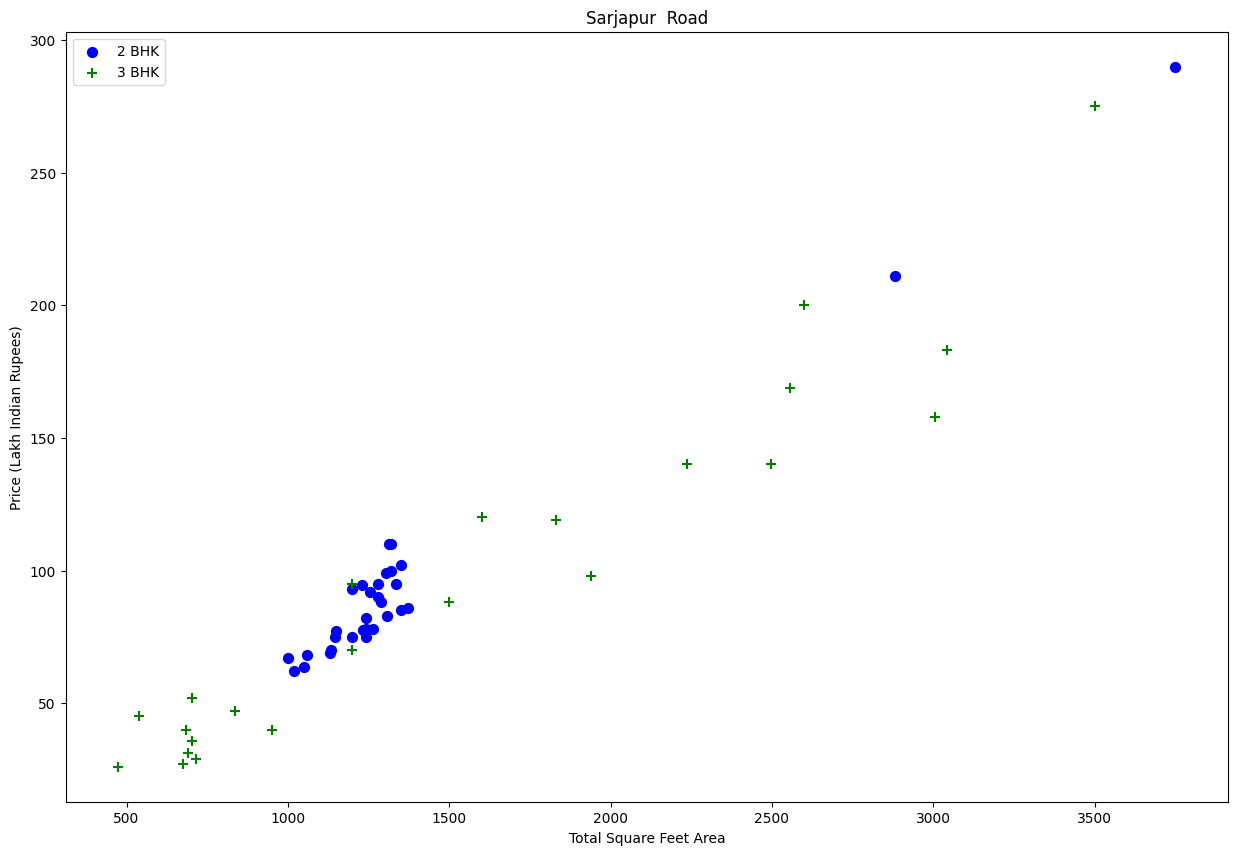

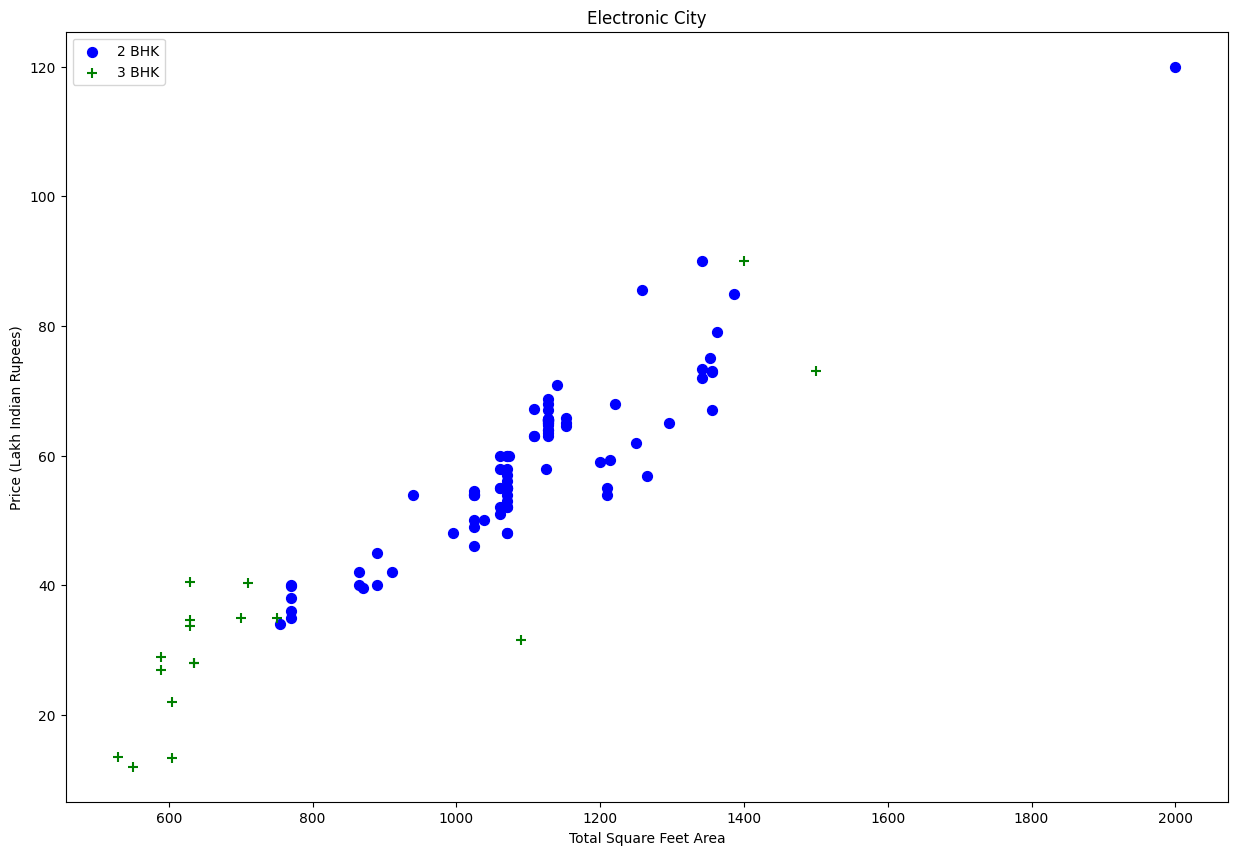

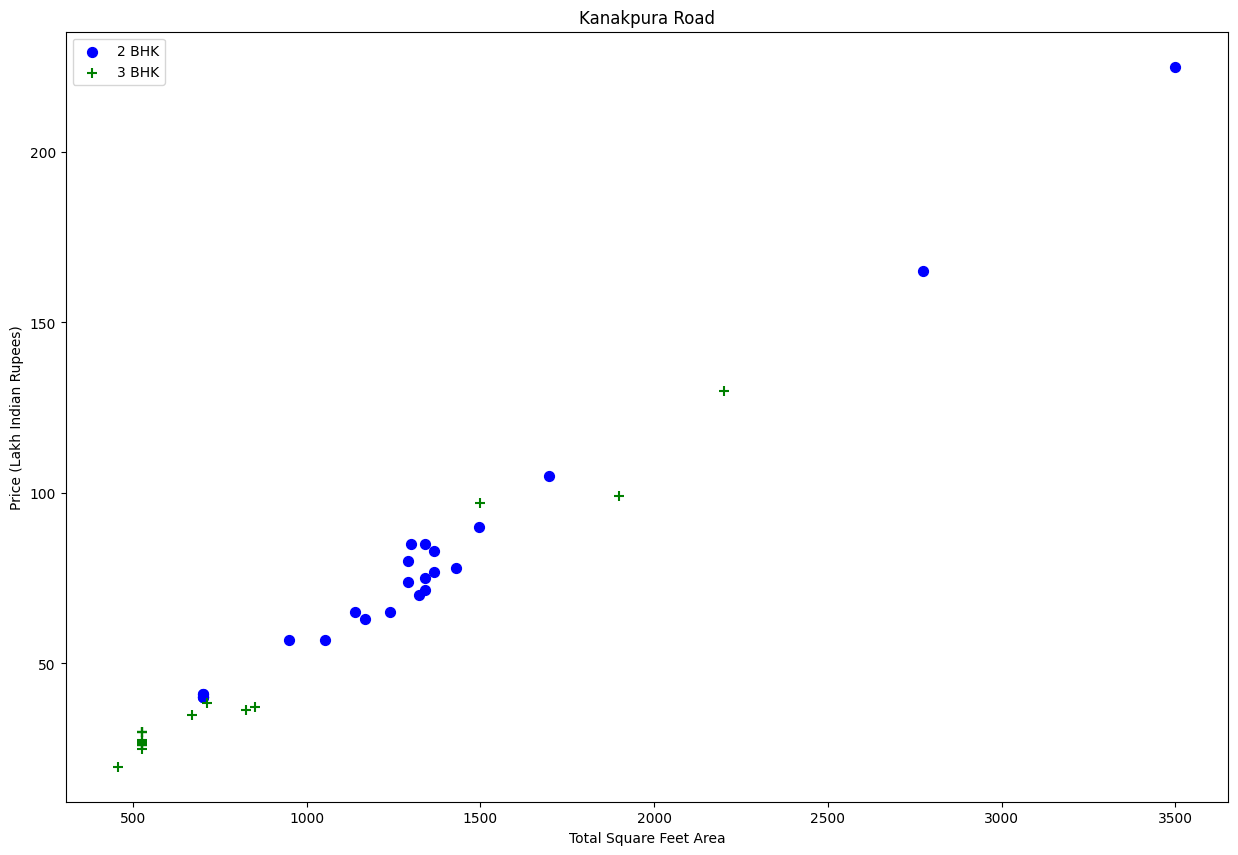

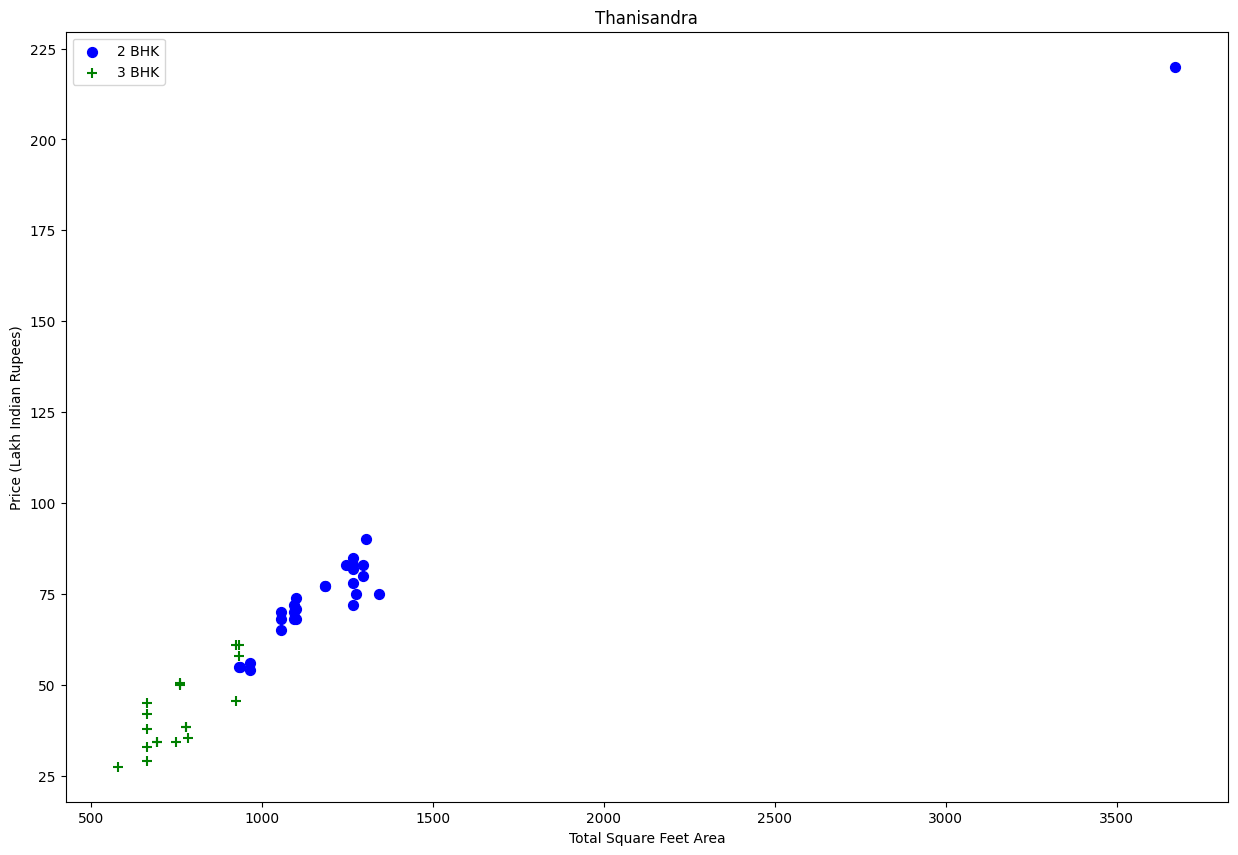

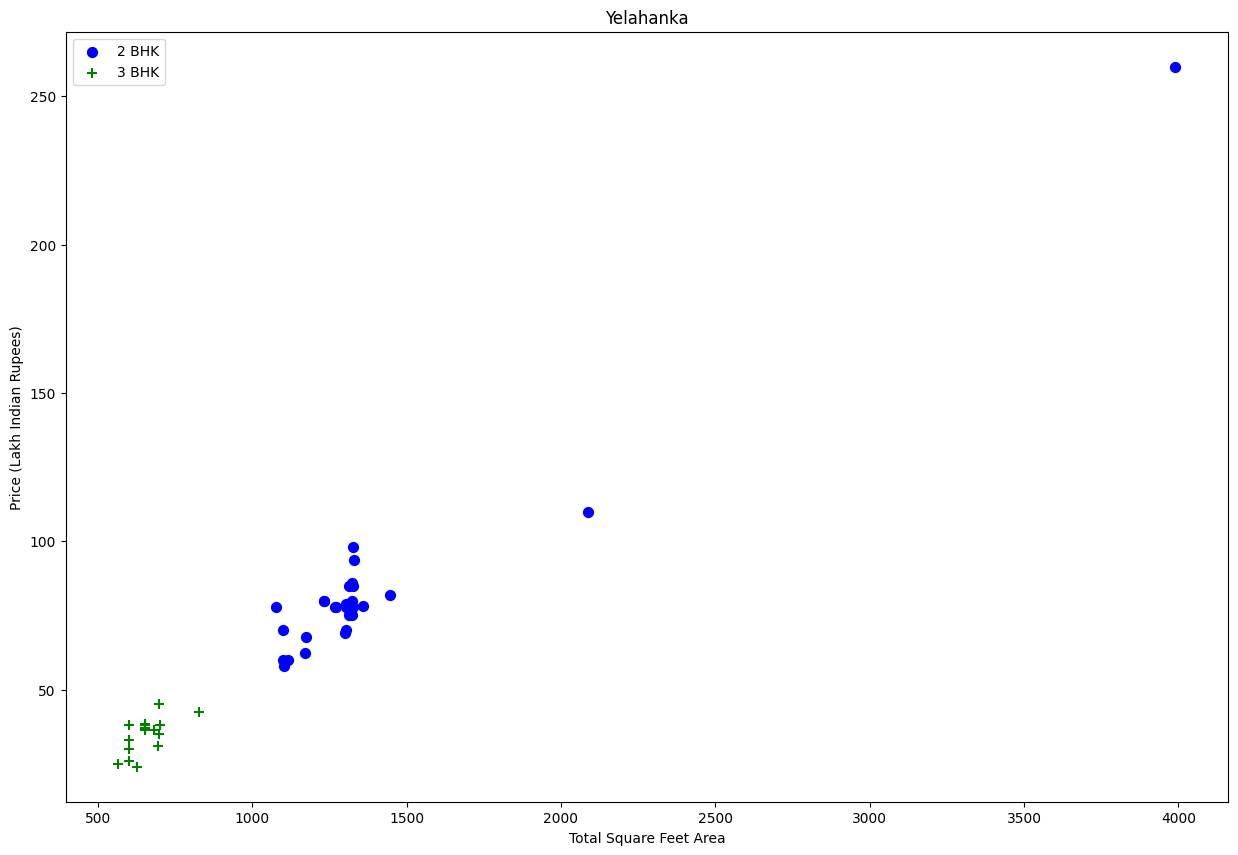

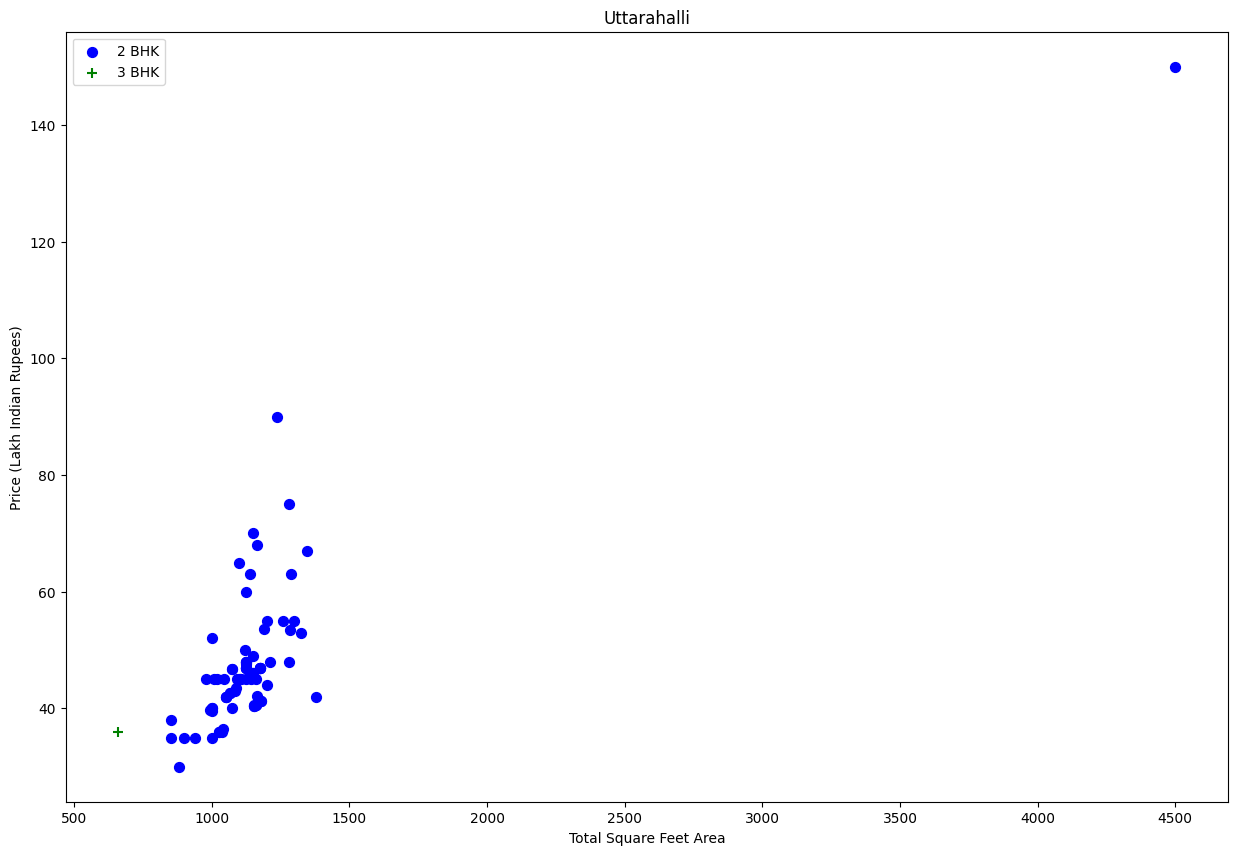

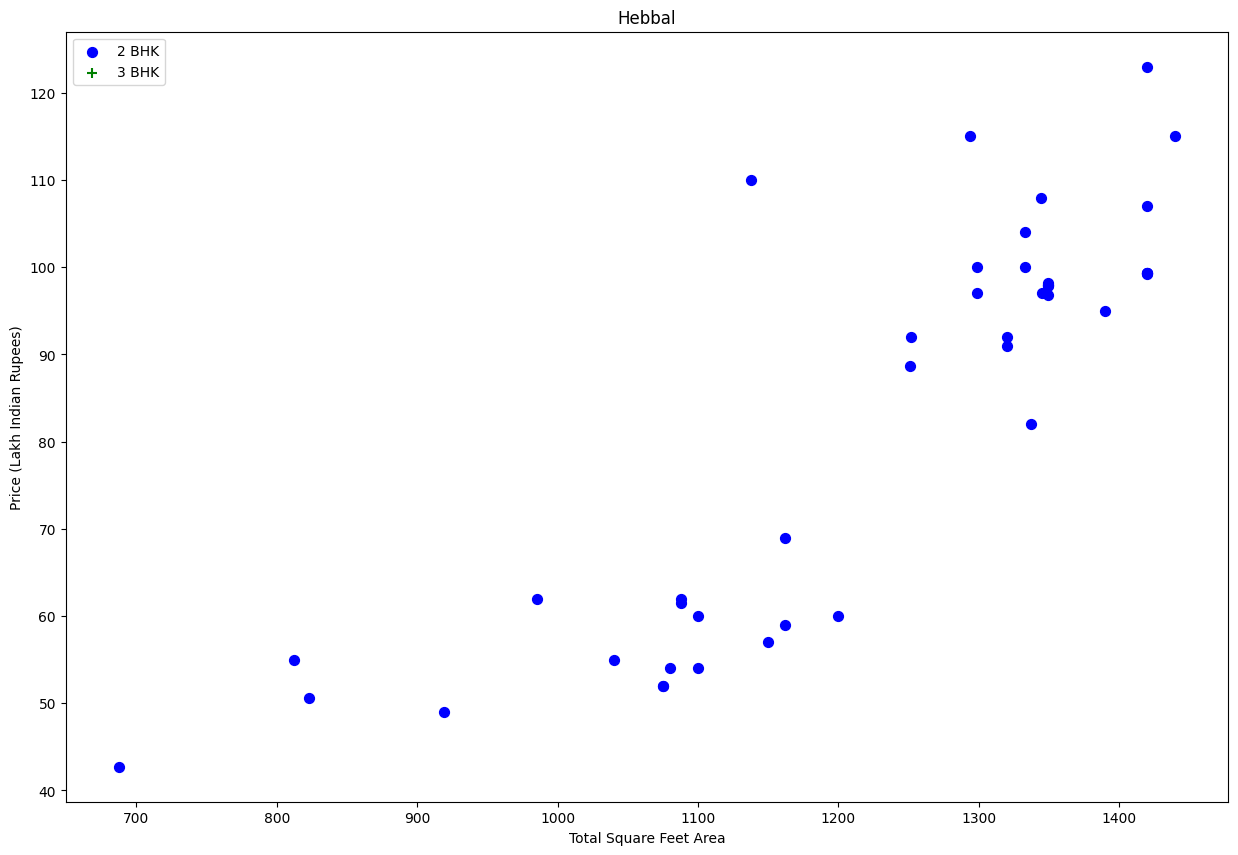

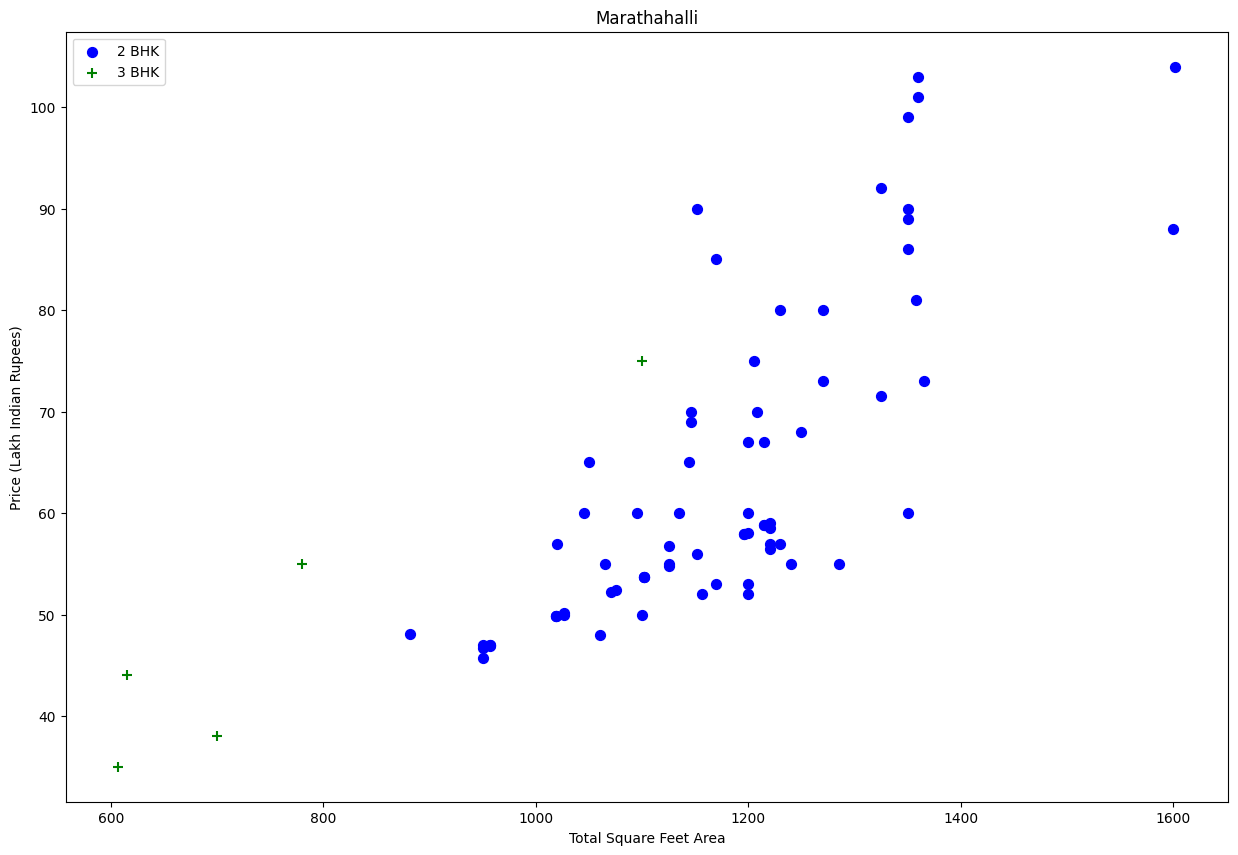

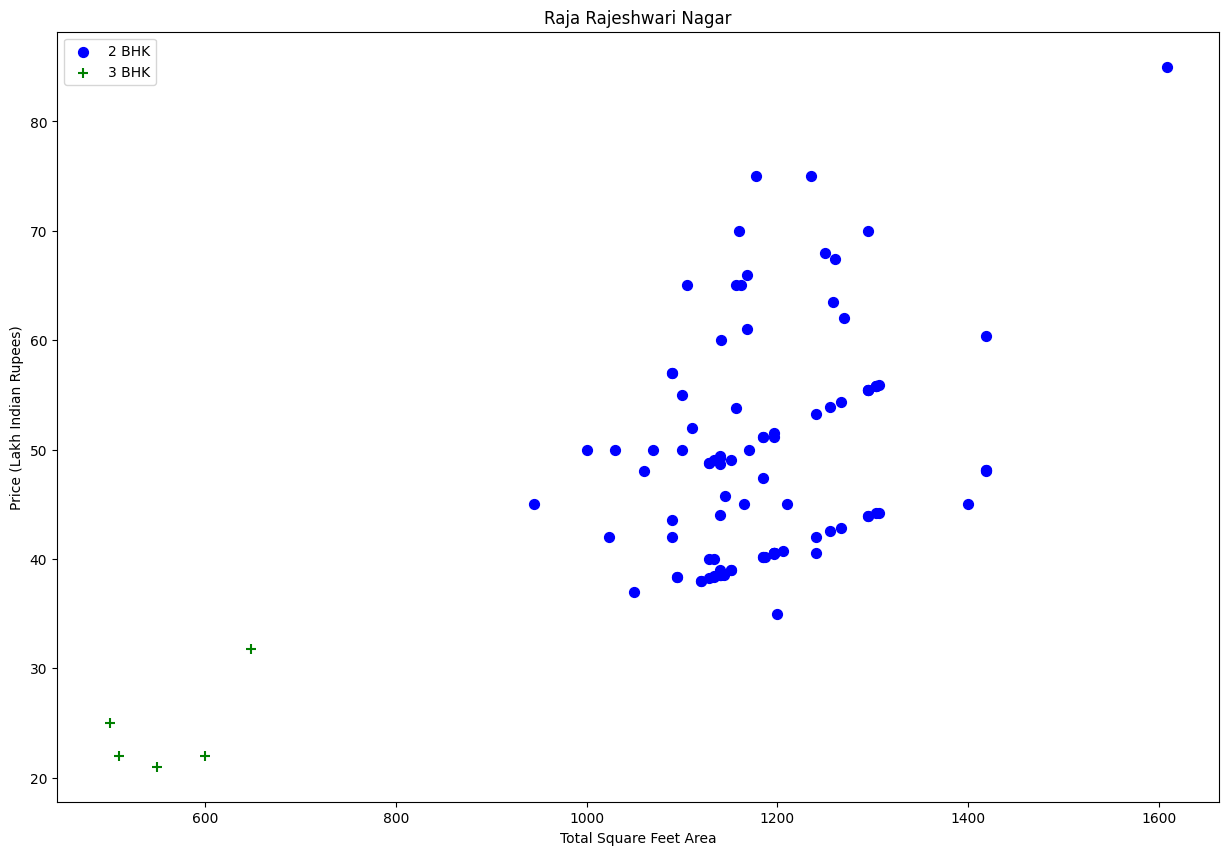

In [275]:
for i in location_count.index[0:10]:
    (plot_scatter_chart(data_7,i))

Text(0, 0.5, 'Count')

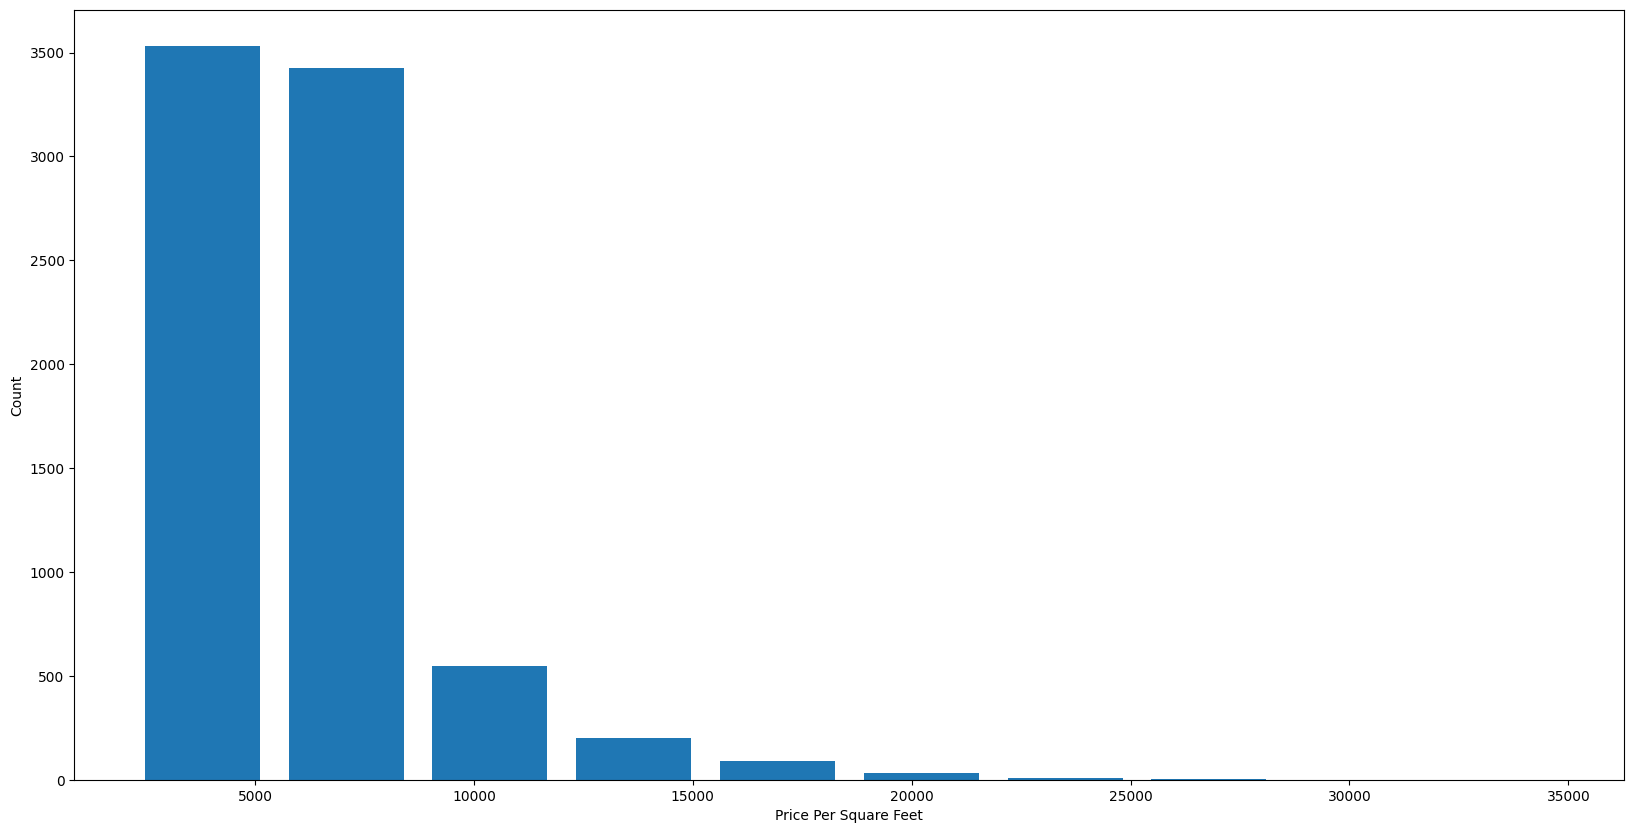

In [276]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data_7.Price_Per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [277]:
data_7["bath"].unique()

array([ 7,  3,  4,  2,  5,  6,  1,  8,  9, 14, 12, 27, 10, 16, 13],
      dtype=int64)

In [278]:
data_7[(data_7["bath"]>10)]

,location,size,total_sqft,bath,price,Price_Per_Sqft
680,BTM 1st Stage,9,3300.0,14,500.0,15151.515152
5984,Neeladri Nagar,12,4000.0,12,160.0,4000.000000
8621,Wilson Garden,8,1850.0,12,300.0,16216.216216
9134,other,29,8000.0,27,230.0,2875.000000
9268,other,12,12000.0,12,525.0,4375.000000
9327,other,18,10000.0,16,550.0,5500.000000
9786,other,13,6000.0,12,150.0,2500.000000
10005,other,15,5425.0,13,275.0,5069.124424


In [279]:
data_7[(data_7["bath"]>data_7["size"]+2)]

,location,size,total_sqft,bath,price,Price_Per_Sqft
680,BTM 1st Stage,9,3300.0,14,500.0,15151.515152
1729,Chamrajpet,6,1500.0,9,230.0,15333.333333
1886,Chikkabanavar,4,2460.0,7,80.0,3252.032520
5930,Nagasandra,4,7000.0,8,450.0,6428.571429
8621,Wilson Garden,8,1850.0,12,300.0,16216.216216


In [280]:
data_8 = data_7[(data_7["bath"]<data_7["size"]+2)]

In [281]:
data_8

,location,size,total_sqft,bath,price,Price_Per_Sqft
0,1st Block HRBR Layout,7,2400.0,7,355.0,14791.666667
1,1st Block HRBR Layout,3,600.0,3,90.0,15000.000000
2,1st Block HRBR Layout,3,600.0,3,125.0,20833.333333
3,1st Block HRBR Layout,3,600.0,4,125.0,20833.333333
4,1st Block Jayanagar,6,2850.0,4,428.0,15017.543860
...,...,...,...,...,...,...
10377,other,4,1650.0,1,130.0,7878.787879
10379,other,6,1200.0,3,125.0,10416.666667
10380,other,3,1800.0,1,200.0,11111.111111
10381,other,4,1353.0,2,110.0,8130.081301


In [282]:
semi_final_data = data_8.drop("Price_Per_Sqft",axis=1)

In [283]:
semi_final_data

,location,size,total_sqft,bath,price
0,1st Block HRBR Layout,7,2400.0,7,355.0
1,1st Block HRBR Layout,3,600.0,3,90.0
2,1st Block HRBR Layout,3,600.0,3,125.0
3,1st Block HRBR Layout,3,600.0,4,125.0
4,1st Block Jayanagar,6,2850.0,4,428.0
...,...,...,...,...,...
10377,other,4,1650.0,1,130.0
10379,other,6,1200.0,3,125.0
10380,other,3,1800.0,1,200.0
10381,other,4,1353.0,2,110.0


In [284]:
final_data = pd.get_dummies(semi_final_data,columns=["location"],dtype=int)

In [285]:
semi_final_data = semi_final_data[semi_final_data["price"]<1000 ]
semi_final_data = semi_final_data[semi_final_data["total_sqft"]<8000]

In [286]:
final_data.head()

,size,total_sqft,bath,price,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Block Hrbr Layout,location_2nd Phase JP Nagar,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_other
0,7,2400.0,7,355.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,600.0,3,90.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,600.0,3,125.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,600.0,4,125.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,2850.0,4,428.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [287]:
final_data.shape

(7808, 389)

In [288]:
X = final_data.drop(["price"],axis=1)

In [289]:
X.head()

,size,total_sqft,bath,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_2nd Block Hrbr Layout,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_other
0,7,2400.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,600.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,600.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,600.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,2850.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
Y = final_data["price"]

In [291]:
Y.head()

0    355.0
1     90.0
2    125.0
3    125.0
4    428.0
Name: price, dtype: float64

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [294]:
len(X_train)

6246

In [295]:
len(y_train)

6246

In [308]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7839348909885997

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

0.7178627344110133

In [299]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [300]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([ 8.26647326e-01,  6.87644999e-01, -3.22812626e+13,  6.44550003e-01,
        8.16704617e-01,  8.27088306e-01, -2.81610925e+11,  8.46414278e-01,
        7.62883358e-01,  8.60908132e-01])

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
                'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params':{
                'n_estimators':[100,200,300],
                'criterion' : ['mse','friedman_mse'],
                'oob_score'  :[True,False]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [302]:
find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.761620,{'fit_intercept': False}
1,lasso,0.634329,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.705604,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,RandomForestRegressor,0.666904,"{'criterion': 'friedman_mse', 'n_estimators': ..."


In [303]:
# #,
#         "LogisticRegression" :{
#         "model":LogisticRegression(),
#         "params" : {
#              "C": [1.0,10.0]
#         }
#         }

In [304]:
import pickle
with open('A_Real_Estate_price_Prediction_Project.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [305]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))